In [105]:
import pandas as pd

# https://www.kaggle.com/fedesoriano/heart-failure-prediction
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [106]:
df.shape

(918, 12)

In [107]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<h3>Treat Outliers</h3>

In [108]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [109]:
df.shape

(918, 12)

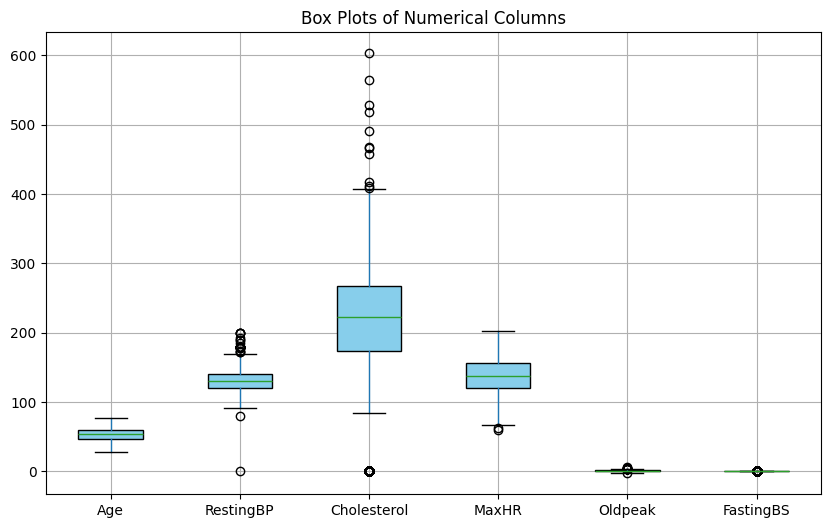

In [110]:
import matplotlib.pyplot as plt
# Create box plots for numerical columns
df.boxplot(column=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','FastingBS'], figsize=(10, 6), patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plots of Numerical Columns')
plt.show()


In [111]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

In [112]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [113]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [114]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [115]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape

(909, 12)

In [116]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [117]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

In [118]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [119]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [120]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [121]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [122]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

<ipython-input-122-a955ffd5ad50>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4.ExerciseAngina.replace(
<ipython-input-122-a955ffd5ad50>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4.ExerciseAngina.replace(
<ipython-input-122-a955ffd5ad50>:9: FutureWarning: A value is trying to be set o

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [123]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,1,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,0,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,1,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,0,True,False,True,False


In [124]:
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease

X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,True,False,True,False


In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [127]:
X_train.shape

(721, 13)

In [128]:
X_test.shape

(181, 13)

In [132]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8729281767955801

In [133]:
from sklearn.metrics import confusion_matrix
y_pre = model.predict(X_test)

In [135]:
cm=confusion_matrix(y_test,y_pre)

In [136]:
cm

array([[73, 18],
       [ 5, 85]])

Text(58.222222222222214, 0.5, 'Actual')

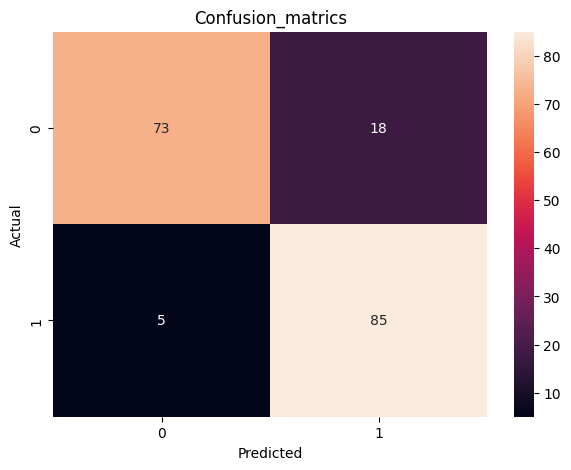

In [142]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.title('Confusion_matrics')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        91
           1       0.83      0.94      0.88        90

    accuracy                           0.87       181
   macro avg       0.88      0.87      0.87       181
weighted avg       0.88      0.87      0.87       181

